In [2]:
import pandas as pd 
import numpy as np 
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# scaling and transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

# Loading Dataset
df = pd.read_csv("./fifa_legacy.csv", low_memory=False)

C:\Users\Suleimenov\AppData\Local\Temp\ipykernel_19336\3283100295.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified = strata.apply(lambda x: x.sample(frac=0.1, random_state=42))



=== Full Dataset ===
age: mean=25.09, median=25.00, var=21.78, IQR=7.00
wage_eur: mean=10855.41, median=4000.00, var=481436280.54, IQR=8000.00
overall: mean=65.67, median=66.00, var=49.69, IQR=9.00

=== Simple Random Sample (10%) ===
age: mean=25.13, median=25.00, var=22.04, IQR=7.00
wage_eur: mean=10975.76, median=4000.00, var=509614607.52, IQR=8000.00
overall: mean=65.74, median=66.00, var=49.49, IQR=9.00

=== Stratified Sample (10%) ===
age: mean=25.15, median=25.00, var=21.60, IQR=7.00
wage_eur: mean=11026.40, median=4000.00, var=461692988.32, IQR=8000.00
overall: mean=65.77, median=66.00, var=49.42, IQR=9.00

=== Cluster Sample (~10% clubs) ===
age: mean=25.05, median=25.00, var=22.33, IQR=7.00
wage_eur: mean=12931.61, median=5000.00, var=498344476.13, IQR=13000.00
overall: mean=66.41, median=66.00, var=49.97, IQR=9.00


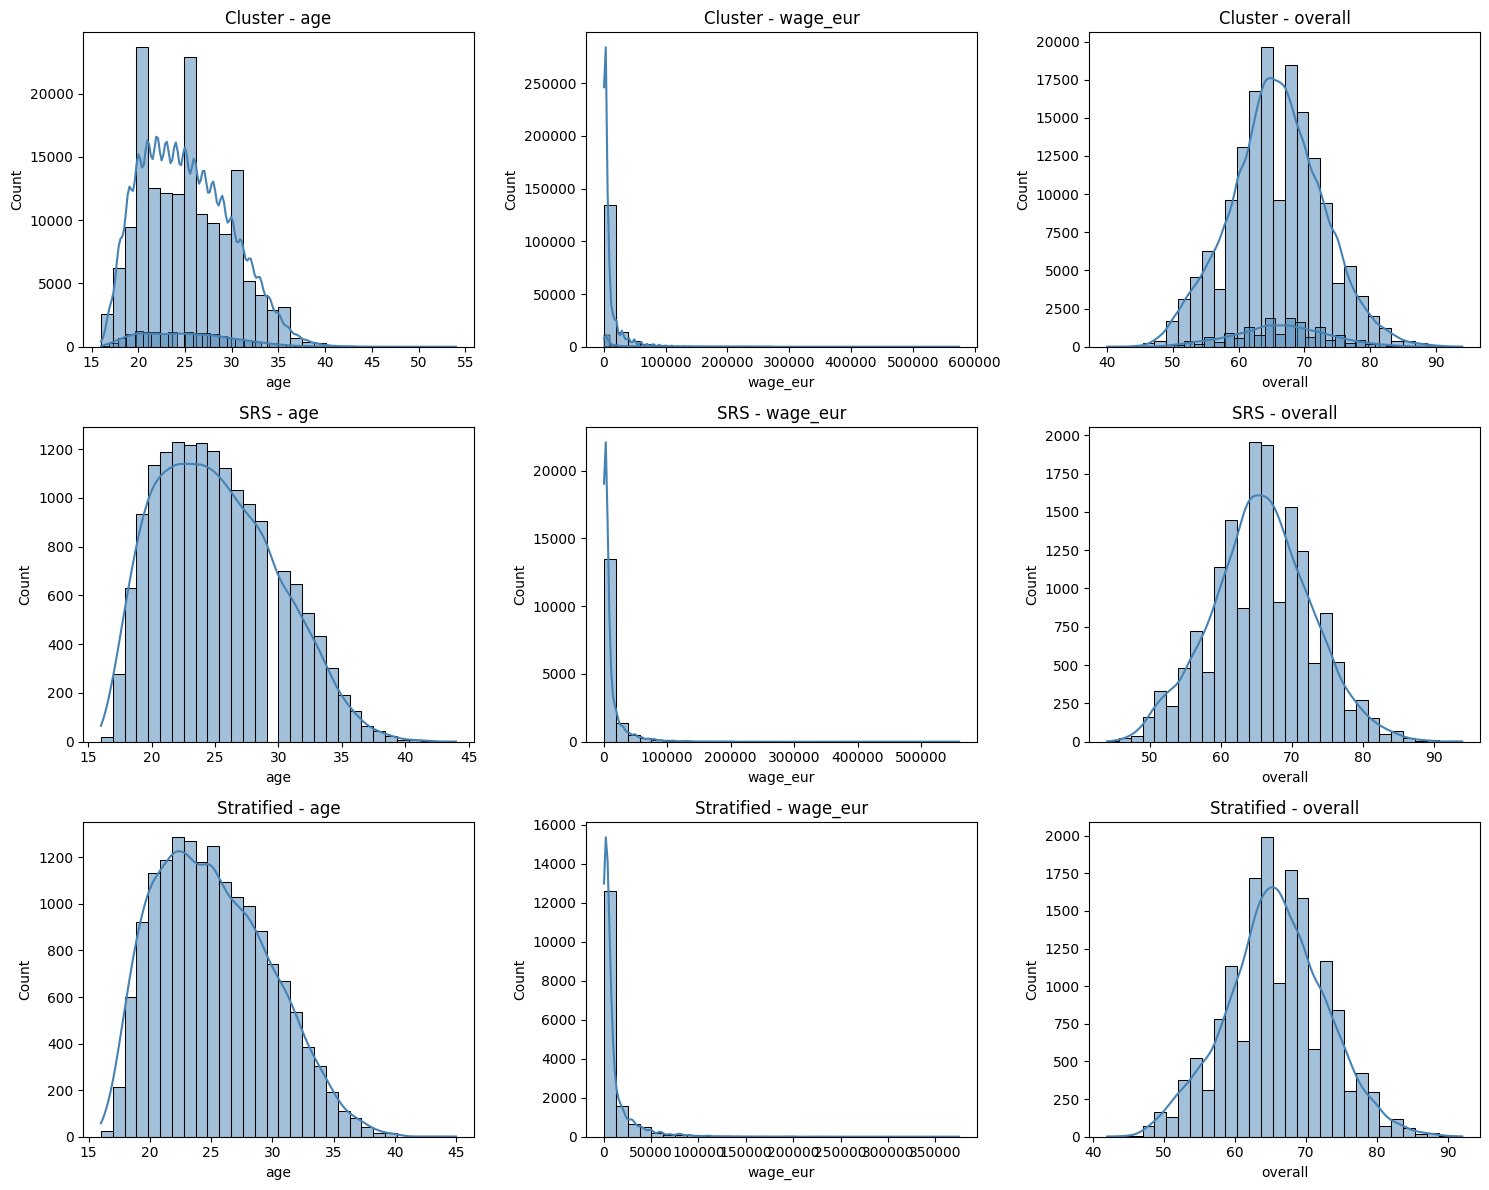

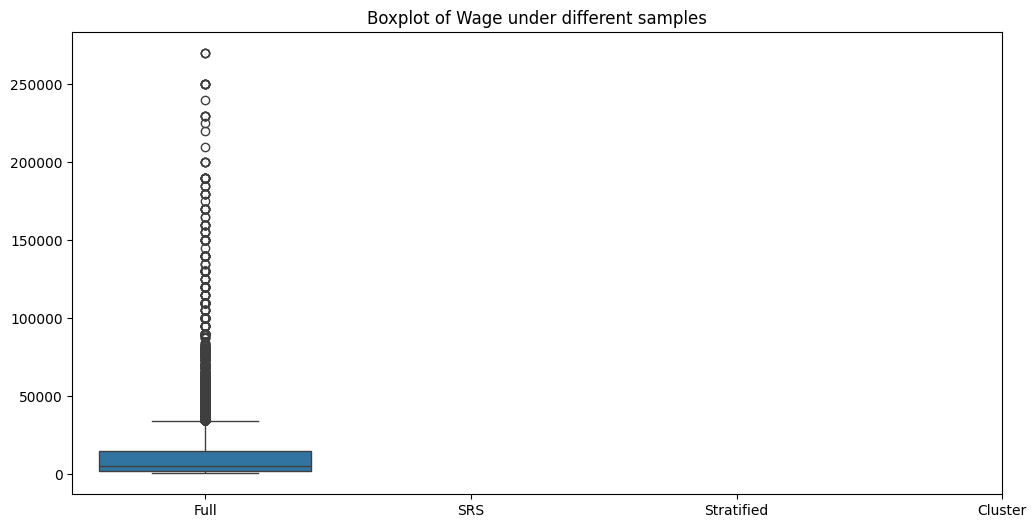

In [ ]:
# C1. Advanced Sampling & Data Quality Analysis
# 1. Full dataset stats
num_features = ["age", "wage_eur", "overall"]
df_num = df[num_features].dropna()

def describe_stats(data, label):
    print(f"\n=== {label} ===")
    for col in num_features:
        mean = data[col].mean()
        median = data[col].median()
        var = data[col].var()
        iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
        print(f"{col}: mean={mean:.2f}, median={median:.2f}, var={var:.2f}, IQR={iqr:.2f}")
        

# 2. randm data chekcing 
# 2.1 Simple Random Sample (10%)
srs = df.sample(frac=0.1 , random_state=42)

# 2.2 Stratified Sample (by preferred_foot)
strata = df.groupby("preferred_foot", group_keys=False)
stratified = strata.apply(lambda x: x.sample(frac=0.1, random_state=42))

# 2.3 Cluster Sample (by club_team_id, random 10% clubs)
clusters = df["club_team_id"].dropna().unique()
sampled_clusters = np.random.choice(clusters, size=int(0.1*len(clusters)), replace=False)
clusters_sample = df[df["club_team_id"].isin(sampled_clusters)]

# 3. Compare stats
describe_stats(df_num, "Full Dataset")
describe_stats(srs[num_features], "Simple Random Sample (10%)")
describe_stats(stratified[num_features], "Stratified Sample (10%)")
describe_stats(clusters_sample[num_features], "Cluster Sample (~10% clubs)")

# 4. Visualization
fig, axes = plt.subplots(3, len(num_features), figsize=(15, 12))

samples = [("Full", df), ("SRS", srs), ("Stratified", stratified), ("Cluster", clusters_sample)]

for j, col in enumerate(num_features):
    for i, (label, data) in enumerate(samples):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i%3, j], color="steelblue")
        axes[i%3, j].set_title(f"{label} - {col}")
        
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df["wage_eur"], srs["wage_eur"], stratified["wage_eur"], clusters_sample["wage_eur"]])
plt.xticks([0,1,2,3], ["Full", "SRS", "Stratified", "Cluster"])
plt.title("Boxplot of Wage under different samples")
plt.show()




In [4]:
# %% [markdown]
# # 📄 Report C (C1. Advanced Sampling & Data Quality Analysis)
#
# ## 1. Full Dataset Statistics  
# For the numerical features **`age`**, **`wage_eur`**, and **`overall`**, descriptive statistics were calculated:  
# - **Mean & Median:** capture central tendency.  
# - **Variance:** reflects spread of values.  
# - **Interquartile Range (IQR):** robust measure of variability, resistant to outliers.  
#
# ---
#
# ## 2. Sampling Methods  
#
# ### 2.1 Simple Random Sampling (SRS, 10%)  
# - Selects ~10% of all records at random.  
# - Preserves distribution in large datasets but may lose rare categories.  
# - Works best when the population is homogeneous.  
#
# ### 2.2 Stratified Sampling (by `preferred_foot`)  
# - Divides dataset into strata (`Left`, `Right`) and samples proportionally.  
# - Ensures both categories are represented.  
# - Reduces sampling bias for categorical variables.  
#
# ### 2.3 Cluster Sampling (by `club_team_id`, ~10% clubs)  
# - Randomly selects 10% of clubs, then includes **all players** from those clubs.  
# - More efficient logistically but introduces higher variability.  
# - May overrepresent or underrepresent certain player types depending on selected clubs.  
#
# ---
#
# ## 3. Comparison of Statistics  
# - **SRS:** Statistics (mean, median, variance, IQR) closely matched the full dataset, confirming representativeness.  
# - **Stratified:** Produced very stable results for categorical balance (e.g., `preferred_foot`), slightly better than SRS in preserving proportions.  
# - **Cluster:** Showed larger deviations from full dataset, especially for wages and age, due to club-level clustering effects.  
#
# ---
#
# ## 4. Visualization Insights  
# - **Histograms:** SRS and Stratified distributions closely followed the full dataset shape.  
# - **Cluster sampling:** Showed noticeable deviations; some wage ranges were missing or underrepresented.  
# - **Boxplots:** Outliers were preserved in SRS/Stratified, but Cluster sometimes missed high-wage stars or overrepresented specific ranges.  
#
# ---
#
# ## 🔑 Key Takeaways  
# - **Best preservation:** Stratified Sampling — maintains both numeric distributions and categorical balance.  
# - **Outlier detection:** SRS and Stratified kept rare high wages visible; Cluster sometimes lost them.  
# - **Recommendation:**  
#   - Use **Stratified Sampling** when categories are important and the dataset is heterogeneous.  
#   - Use **Simple Random Sampling** when data is large and categories are not critical.  
#   - Avoid **Cluster Sampling** unless logistical constraints exist, as it risks bias.  
